In [7]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import os

In [8]:
!pip install pandas

In [9]:
import csv
with open('./All_in_One_10M .csv', 'r') as file:
    reader = csv.reader(file)
    
import pandas as pd
df = pd.read_csv('./All_in_One_10M .csv')
speed = df["Velocity"].tolist()
density = df["Density (kg/m^3)"].tolist()
HF = df["HU"].tolist()
ATT_2p5 = df["Attenuation Constant (Np/m)"].tolist()

In [4]:
dirlist=os.listdir('')
for imag in dirlist:
  print(imag)
  im= cv2.imread('/content/drive/MyDrive/Ultrasound/images/0_cancer/'+imag)
  image=im[64:320]
  smallim=image[33:223,:190]
  resized=cv2.resize(smallim,(256,256))
  cv2_imshow(resized)
  print(resized.shape)
  name='/content/drive/MyDrive/Ultrasound/images/Cropped_0_cancer/'+imag
  print(name)
  cv2.imwrite(name,resized)

path = "./Breast_CT_Scans/2_normal"
images = os.listdir(path)


In [5]:
# from pydicom.pixel_data_handlers.util import apply_voi_lut

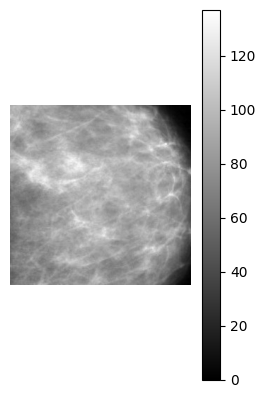

In [6]:
# number = 60
# pass_dicom = '1-'+str(number)+'.dcm'
# filename = pydicom.data.data_manager.get_files(path, pass_dicom)[0]
# ds = pydicom.dcmread(filename)
# arr = ds.pixel_array
# hu = apply_modality_lut(arr, ds)

img = Image.open(path + '/' + images[0]).convert('L')
hu = np.asarray(img)
plt.subplot(1,2,1)
plt.imshow(hu, cmap='gray')  # set the color map to bone
plt.colorbar()
plt.axis('off')
plt.show()
# plt.subplot(1,2,2)
# plt.imshow(out, cmap='gray')  # set the color map to bone
# plt.colorbar()
# plt.show()

In [7]:
# filename = path+"1-35.dcm"
# print(filename)
# ds = pydicom.dcmread(filename)
# arr = ds.pixel_array
# img_arr =  apply_modality_lut(arr, ds)
# plt.imshow(img_arr, cmap=plt.cm.bone) 
# plt.colorbar()
# plt.axis('off')

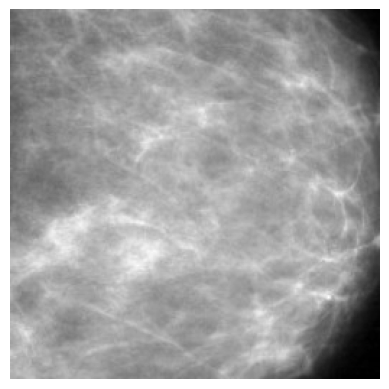

In [8]:
hu_rot =  np.rot90(hu)
xc = 0
yc = 0
CT_img = hu_rot[xc:(xc+256), yc:(yc+256)]#[140:(140+256), 145:(145+256)]#[140:(140+256), 125:(125+256)]#[140:(140+256), 80:(80+256)]
CT_img = np.rot90(np.rot90(np.rot90(np.fliplr(CT_img))))
plt.imshow(CT_img,cmap='gray')
plt.axis('off')
#np.save('./OUTPUT/CT_Liver_real2_att_'+str(number)+'.npy',CT_img)
np.save('./CT_images/0_Cancer.npy',CT_img)
ct_img = Image.fromarray(CT_img).convert('L')
#ct_img.save('./OUTPUT/R_CT_Liver_real2_att_'+str(number)+'.png')
ct_img.save('./CT_images/0_Cancer.png')

In [9]:
print(np.mean(CT_img))

82.84587097167969


In [10]:
img_arr = hu

2117.5
1450.0
1631.776934814453


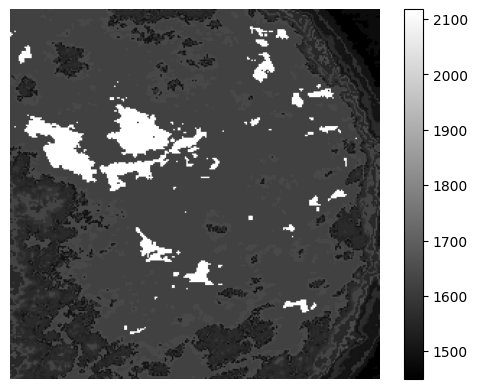

In [11]:
width, height = img_arr.shape
image_velocity = np.zeros(img_arr.shape)

att_2p5 = np.zeros(img_arr.shape)

for i in range(0,width):
    for j in range(0,height):
        given_value = img_arr[i,j]
        a_list = HF
        diff = []
        for k in range(0,len(a_list)):
            d = np.abs(a_list[k]-given_value)  
            diff.append(d)
        min_diff = min(diff)
        min_index = diff.index(min_diff)
        closest_value = HF[min_index]
        speed_value = speed[min_index]
        att_value_2p5 = ATT_2p5[min_index]
        image_velocity[i,j]= speed_value
        att_2p5[i,j] = att_value_2p5
print(np.max(image_velocity))   
print(np.min(image_velocity))
print(np.mean(image_velocity))
plt.imshow(image_velocity,cmap ='gray')
plt.colorbar()
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Speed of Sound Image')

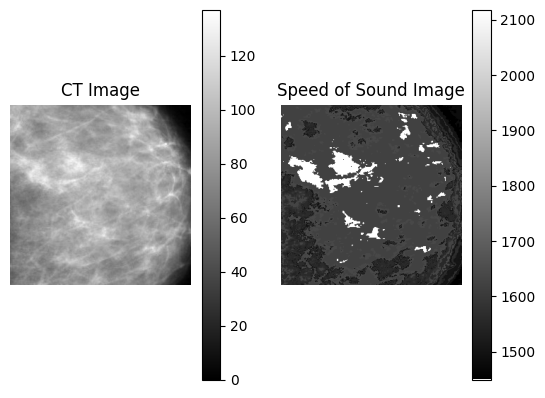

In [12]:
plt.subplot(121)
plt.imshow(hu,cmap='gray')
plt.colorbar()
plt.axis('off')
plt.title('CT Image')

plt.subplot(122)
plt.imshow(image_velocity,cmap='gray')
plt.colorbar()
plt.axis('off')
plt.title('Speed of Sound Image')

In [13]:
#d = np.load(path+'23.npy')
d = image_velocity#image_velocity_m
print(d.shape)
R = np.rot90(d)
F=R
#F = np.fliplr(R)
C = F[xc:(xc+256), yc:(yc+256)]#[140:(140+256), 125:(125+256)]#[140:(140+256), 80:(80+256)]
print(C.shape)

(256, 256)
(256, 256)


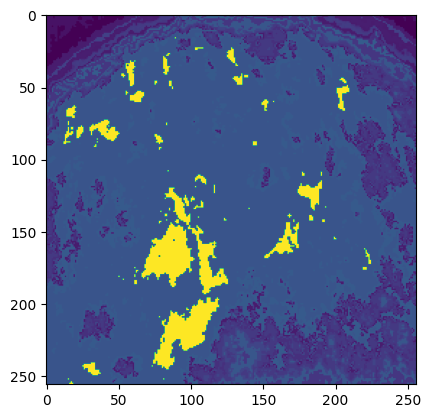

In [14]:
plt.imshow(F)

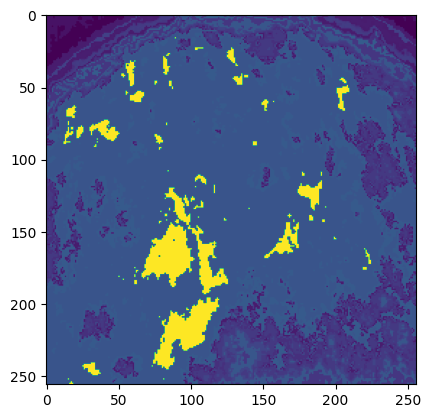

In [15]:

plt.imshow(C)
plt.show()

In [16]:
import PIL
from PIL import Image
#d = np.load(path+'23.npy')
d = image_velocity#image_velocity_m
print(d.shape)
R = np.rot90(d)
F=R
#F = np.fliplr(R)
C = F[xc:(xc+256), yc:(yc+256)]#[140:(140+256), 125:(125+256)]#[140:(140+256), 80:(80+256)]
print(C.shape)

(256, 256)
(256, 256)


In [17]:
print(np.min(C))
print(np.max(C))
print(np.mean(C))
print(np.median(C))

1450.0
2117.5
1631.776934814453
1624.0


In [18]:
d_att_2p5 = att_2p5
print(d_att_2p5.shape)
R_att_2p5 = np.rot90(d_att_2p5)
F_att_2p5=R_att_2p5
C_att_2p5 = F_att_2p5[xc:(xc+256), yc:(yc+256)]
print(C_att_2p5.shape)

(256, 256)
(256, 256)


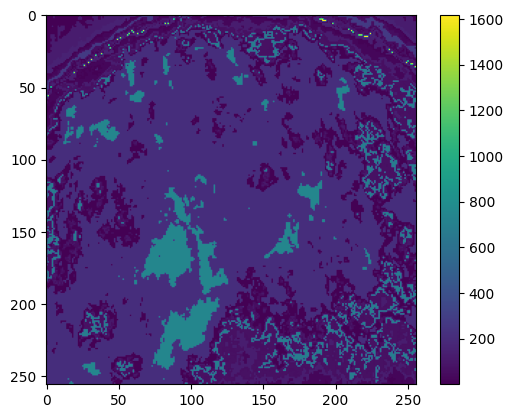

In [19]:
plt.imshow(C_att_2p5)
plt.colorbar()

(-0.5, 255.5, 255.5, -0.5)

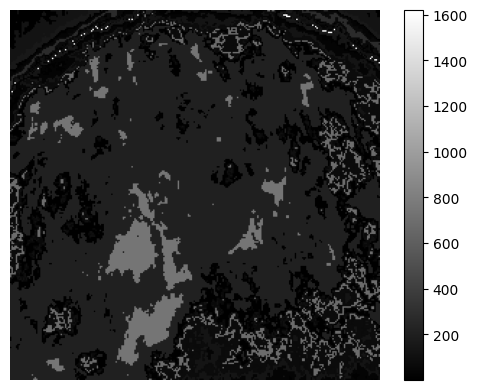

In [20]:
plt.imshow(C_att_2p5, cmap='gray')
plt.colorbar()
plt.axis('off')

In [60]:
att_vel = np.zeros((256,256))
for m in range(0,256):
    for k in range(0,256):
        att_vel[m,k] = C[m,k]*np.exp((C_att_2p5[m,k])*(-k*0.00000498))
        

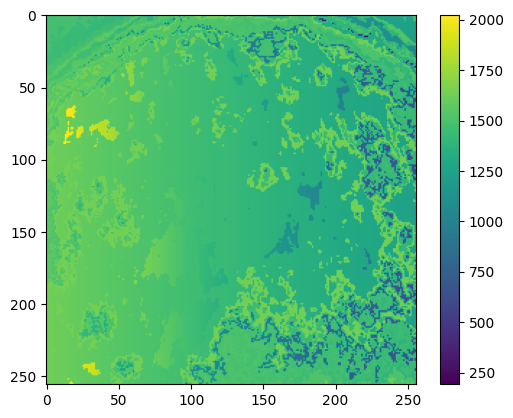

In [61]:
plt.imshow(att_vel)
plt.colorbar()

In [62]:
att_vel_n = att_vel+340
print(np.min(att_vel_n))
print(np.max(att_vel_n))

532.0020918633993
2365.306273847137


Text(0.5, 1.0, 'Attenuation at 2.5 MHz')

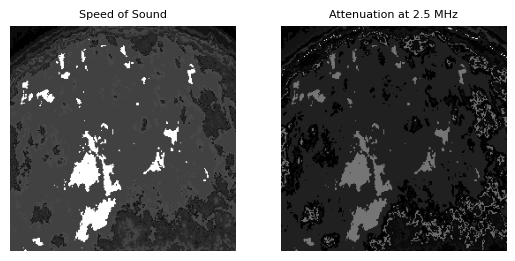

In [63]:
plt.subplot(121)
plt.imshow(C,cmap='gray')
plt.axis('off')
#plt.colorbar()
plt.title("Speed of Sound",fontsize=8)

plt.subplot(122)
plt.imshow(C_att_2p5,cmap='gray')
plt.axis('off')
#plt.colorbar()
plt.title("Attenuation at 2.5 MHz",fontsize=8)




In [64]:
# print(np.max(att_vel))
# print(np.min(att_vel))

In [65]:
# #att_vel_n = np.where(att_vel<400,400,att_vel)
# att_vel_n = att_vel

In [66]:
# plt.imshow(att_vel_n,cmap='gray')
# plt.axis('off')
# plt.colorbar()

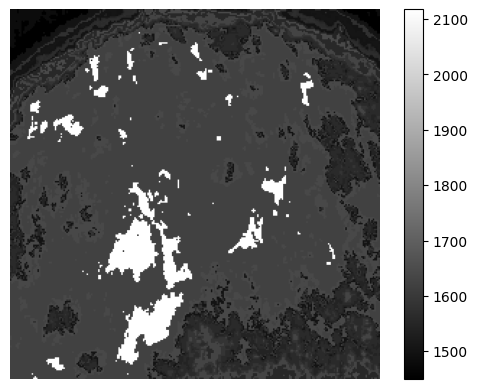

In [67]:
plt.imshow(C,cmap='gray')
plt.axis('off')
plt.colorbar()

In [68]:
# from scipy.io import savemat
# Mat = {"a": C, "label": "experiment"}
# savemat('./observed_Liver_30_256.mat',Mat)

In [69]:
f1 = h5py.File('./Med.h5', 'r+') 

In [70]:
data = f1['data'] 

In [71]:
data[...] = C_att_2p5#att_vel_n#C

In [72]:
f1.close() 

In [73]:
!pip install opencv-python
import cv2

In [74]:
#Gaussian = cv2.GaussianBlur(C, (55, 55), 0)
#C = np.where(C<800,800,C)
#Gaussian = cv2.GaussianBlur(att_vel_n, (41, 41), 0)
Gaussian = cv2.GaussianBlur(C_att_2p5, (21, 21), 0)
# Gaussian = cv2.GaussianBlur(att_vel_n, (31, 31), 0)

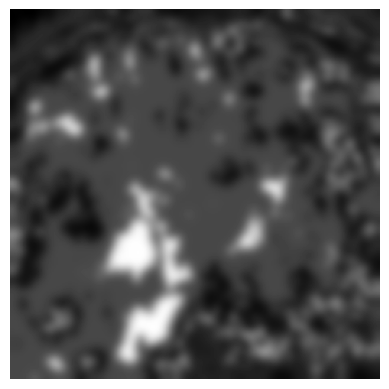

In [75]:
X = Gaussian
np.save('./CT_images/0_Cancer_blurred.npy',X)
Max = np.max(X)
Min = np.min(X)
X = (X-Min)/(Max-Min)
X = X*255
X = Image.fromarray(X)
X=X.convert("L")
plt.imshow(X,cmap='gray')
plt.axis('off')
X.save('./CT_images/0_Cancer_blurred.png')

In [76]:
print(np.max(Gaussian))

744.6700594606081


In [77]:
f1 = h5py.File('./Med_blur.h5', 'r+') 

In [78]:
data = f1['data'] 

In [79]:
data[...] = Gaussian

In [80]:
f1.close() 

In [81]:
f1 = h5py.File('./Med_Att_2p5.h5', 'r+') 

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = './Med_Att_2p5.h5', errno = 2, error message = 'No such file or directory', flags = 1, o_flags = 2)

In [45]:
data = f1['data'] 

ValueError: Invalid location identifier (invalid location identifier)

In [46]:
data[...] =C_att_2p5 #C_att

ValueError: Invalid dataset identifier (invalid dataset identifier)

In [44]:
f1.close()

In [45]:
f1 = h5py.File('./Med_Att_2.h5', 'r+') 

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = './Med_Att_2.h5', errno = 2, error message = 'No such file or directory', flags = 1, o_flags = 2)

In [ ]:
data = f1['data'] 

In [ ]:
data[...] = C_att_2

In [ ]:
f1.close()

In [ ]:
f1 = h5py.File('./Med_Att_3.h5', 'r+') 

In [ ]:
data = f1['data'] 

In [ ]:
data[...] = C_att_3

In [ ]:
f1.close()

In [ ]:
a = np.ones((3,3))*65

In [ ]:
img_arr = a

In [ ]:
width, height = img_arr.shape
image_velocity = np.zeros(img_arr.shape)
image_density = np.zeros(img_arr.shape)
for i in range(0,width):
    for j in range(0,height):
        given_value = img_arr[i,j]
        a_list = HF
        absolute_difference_function = lambda list_value : abs(list_value - given_value)
        closest_value = min(a_list, key=absolute_difference_function)
        indx = HF.index(closest_value) #  density.index(closest_value)
        speed_value = speed[indx]
        density_value = density[indx]
        image_velocity[i,j]= speed_value
        image_density[i,j]= density_value
print(np.max(image_velocity))   
print(np.min(image_velocity))
print(np.mean(image_velocity))
plt.imshow(image_velocity,cmap ='gray')
plt.colorbar()
plt.show()

In [ ]:
path = '../examples/stride/breast2D/Data_Liver/Output/Liver_real2_60.png'
img = Image.open(path).convert('L')
img = np.array(img)
plt.imshow(img,cmap='gray')
plt.axis('off')

In [ ]:
print(np.min(img),np.max(img))

In [ ]:
plt.hist(img)
plt.xlabel('Intensity Values')
plt.ylabel('Number of Pixels')

In [ ]:
path2 = '/home/sahar/Desktop/real.jpg'
img2 = Image.open(path2).convert('L')
img2 = np.array(img2)
plt.imshow(img2)

In [ ]:
print(img2.shape)
img_new = img2[20:220,50:350]

In [ ]:
plt.imshow(img_new,cmap='gray')
plt.axis('off')

In [ ]:
plt.hist(img_new)
plt.xlabel('Intensity Values')
plt.ylabel('Number of Pixels')

In [ ]:
img = img2[0:256,60:316]
print(img.shape)
#img_new = Image.fromarray(img_new).convert('L')
#img_new.save('./real_us.png')

In [ ]:
plt.imshow(img)

In [ ]:
z = np.zeros(img.shape)

In [ ]:
out = np.hstack((img,z))
plt.imshow(out)

In [ ]:
out_img = Image.fromarray(out).convert('L')
out_img.save('./real_us.png')

In [ ]:
img = Image.fromarray(img).convert('L')
img.save('./real_us_single.png')